In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

#### Q2. What is the shape of "movies.csv"?

In [3]:
movies_df = pd.read_csv("movies.csv")
movies_df.shape

(9742, 3)

#### Q3. What is the shape of "ratings.csv"?

In [4]:
ratings_df = pd.read_csv("ratings.csv")
ratings_df.shape

(100836, 4)

#### Q4. How many unique "userId" are available in "ratings.csv"?

In [5]:
len(ratings_df['userId'].unique())

610

#### Q5. Which movie has recieved maximum number of user ratings?

In [6]:
maxRatings_Movie = ratings_df.groupby('movieId')['rating'].sum().reset_index()
maxRatings_Movie = maxRatings_Movie.sort_values(by='rating',ascending=False)
maxRatings_Movie.head()

,movieId,rating
277,318,1404.0
314,356,1370.0
257,296,1288.5
1938,2571,1165.5
510,593,1161.0


In [7]:
movies_df.loc[movies_df['movieId']==318]

,movieId,title,genres
277,318,"Shawshank Redemption, The (1994)",Crime|Drama


#### Q6. Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [8]:
movies_df.loc[movies_df['title']=='Matrix, The (1999)']

,movieId,title,genres
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [10]:
tags_df = pd.read_csv('tags.csv')
tags_df.loc[tags_df['movieId']==2571]

,userId,movieId,tag,timestamp
815,424,2571,martial arts,1457842912
816,424,2571,sci-fi,1457842899
1646,474,2571,alternate universe,1137204991
2794,537,2571,philosophy,1424141098
2795,537,2571,post apocalyptic,1424141101


#### Q7. What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [11]:
movies_df.loc[movies_df['title']=='Terminator 2: Judgment Day (1991)']

,movieId,title,genres
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi


In [12]:
ratings_df.loc[ratings_df['movieId']==589]['rating'].mean()

3.970982142857143

#### Q8. How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

In [13]:
movies_df.loc[movies_df['title']=='Fight Club (1999)']

,movieId,title,genres
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller


In [14]:
rating_2959 = ratings_df.loc[ratings_df['movieId']==2959]['rating']

Text(0.5, 1.0, 'Data distribution of ratings of movieId 2959')

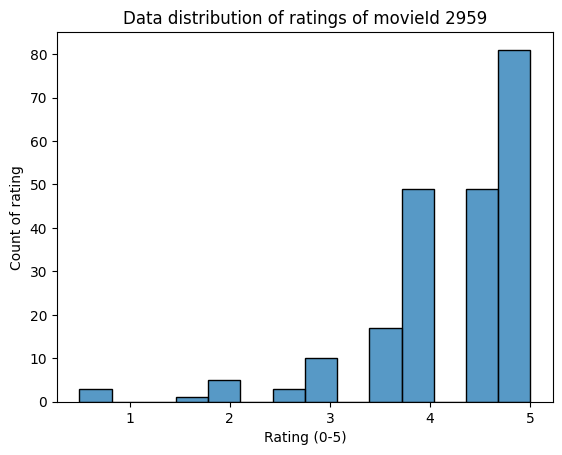

In [17]:
sns.histplot(rating_2959)
plt.xlabel('Rating (0-5)')
plt.ylabel('Count of rating')
plt.title('Data distribution of ratings of movieId 2959')

#### Q9. Which movie is the most popular based on  average user ratings?

In [18]:
# step 1
meanRatings_Movie = ratings_df.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()
meanRatings_Movie.columns = ['movieId', 'rating_count', 'rating_mean']

In [19]:
# Step 2
merged_df = pd.merge(movies_df, meanRatings_Movie, on='movieId', how='inner')

In [20]:
# Step 3: Filter movies with more than 50 user ratings
filtered_df = merged_df[merged_df['rating_count'] > 50]
filtered_df.head()

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185


In [27]:
top5_by_mean = filtered_df.sort_values(by='rating_mean',ascending=False)
top5_by_mean.head()

,movieId,title,genres,rating_count,rating_mean
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
659,858,"Godfather, The (1972)",Crime|Drama,192,4.289062
2224,2959,Fight Club (1999),Action|Crime|Drama|Thriller,218,4.272936
974,1276,Cool Hand Luke (1967),Drama,57,4.271930
602,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97,4.268041


#### Q10. Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [26]:
top5_by_count = filtered_df.sort_values(by='rating_count',ascending=False)
top5_by_count.head()

,movieId,title,genres,rating_count,rating_mean
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


#### Q11. Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [32]:
scifi_movies = filtered_df[filtered_df['genres'].str.contains('Sci-Fi', case=False, na=False)]
sm = scifi_movies.sort_values(by='rating_count',ascending=False).iloc[2]
sm

movieId                                      480
title                       Jurassic Park (1993)
genres          Action|Adventure|Sci-Fi|Thriller
rating_count                                 238
rating_mean                                 3.75
Name: 418, dtype: object

#### Q12. Mention the movieId of the movie which has the highest IMDB rating.

In [43]:
links_df = pd.read_csv('links.csv')
merged_df2 = pd.merge(links_df, filtered_df, on='movieId', how='inner')

In [44]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scraper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    meta_tag = soup.find_all('meta')
    meta_tag = str(meta_tag[6])
    # Use regex to extract the rating
    rating_match = re.search(r'⭐ (\d+\.\d+)', meta_tag)
    # Check if the match is found
    
    if rating_match:
        rating = rating_match.group(1)
        # print("Rating:", rating)
        IMDb_rating.append(rating)
        IMDb_ID.append(imdbId)
        
    else:
        print("Rating not found.")


In [45]:
rating = 0
IMDb_rating = []
IMDb_ID = []
count = 0
for i in merged_df2['imdbId']:
    scraper(i)
        

In [52]:
imb_df = pd.DataFrame({'imdbId':IMDb_ID,'Rating':IMDb_rating})
imb_df.head()

,imdbId,Rating
0,114709,8.3
1,113497,7.1
2,113228,6.6
3,113277,8.3
4,114319,6.3


In [56]:
imb_df2 = pd.merge(links_df,imb_df,on='imdbId', how='inner')
imb_df2.head()

,movieId,imdbId,tmdbId,Rating
0,1,114709,862.0,8.3
1,2,113497,8844.0,7.1
2,3,113228,15602.0,6.6
3,6,113277,949.0,8.3
4,7,114319,11860.0,6.3


In [58]:
imb_df2.sort_values(by='Rating',ascending=False)

,movieId,imdbId,tmdbId,Rating
53,318,111161,278.0,9.3
117,858,68646,238.0,9.2
146,1203,50083,389.0,9.0
364,7153,167260,122.0,9.0
156,1221,71562,240.0,9.0
...,...,...,...,...
70,420,109254,306.0,5.5
28,153,112462,414.0,5.4
73,435,106598,9612.0,5.4
30,160,112715,10329.0,5.3


#### Q13. Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [63]:
df2 = pd.merge(scifi_movies,imb_df2,on='movieId',how='inner')

In [65]:
df2.sort_values(by='Rating',ascending=False)

,movieId,title,genres,rating_count,rating_mean,imdbId,tmdbId,Rating
82,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143,4.066434,1375666,27205.0,8.8
43,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446,133093,603.0,8.7
85,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0,8.7
20,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211,4.215640,80684,1891.0,8.7
5,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076,76759,11.0,8.6
...,...,...,...,...,...,...,...,...
3,173,Judge Dredd (1995),Action|Crime|Sci-Fi,62,2.669355,113492,9482.0,5.6
2,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245,113481,9886.0,5.6
9,435,Coneheads (1993),Comedy|Sci-Fi,63,2.420635,106598,9612.0,5.4
1,160,Congo (1995),Action|Adventure|Mystery|Sci-Fi,57,2.877193,112715,10329.0,5.3
